# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
%matplotlib inline

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.tail(10)


,city,date,fare,ride_id,driver_count,type
2365,Lake Jamie,2019-04-19 04:32:47,16.29,3518682119233,4,Rural
2366,North Holly,2019-03-18 10:38:05,40.34,3787775176860,8,Rural
2367,Michaelberg,2019-01-27 18:43:05,38.42,862622008020,6,Rural
2368,Lake Jamie,2019-04-29 01:58:44,54.22,2489264790267,4,Rural
2369,Bradshawfurt,2019-01-30 10:55:23,51.39,1328274868072,7,Rural
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


## Deliverable 1: Get a Summary DataFrame 

In [4]:
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

In [5]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": total_rides, "Total Drivers": total_drivers, "Total Fares": total_fares, "Average Fare per Ride": avg_fare_per_ride, "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [12]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)

In [13]:

pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [14]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

sum_fares_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]


In [28]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
sum_fares_date_df = pd.DataFrame(sum_fares_date)
sum_fares_date_df = sum_fares_date_df.reset_index()
sum_fares_date_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [16]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
sum_fares_date_pivot = sum_fares_date_df.pivot(index="date", columns='type', values='fare')
sum_fares_date_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [17]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, 2019-01-01 to 2019-04-29

fares_pivot = sum_fares_date_pivot.loc['2019-01-01':'2019-04-29',:]
fares_pivot.head(10)


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [18]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_pivot.index = pd.to_datetime(fares_pivot.index)


In [19]:
# 14. Check that the datatype for the index is datetime using df.info()
fares_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
type_sum_fares_week = fares_pivot.resample("W").sum()


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


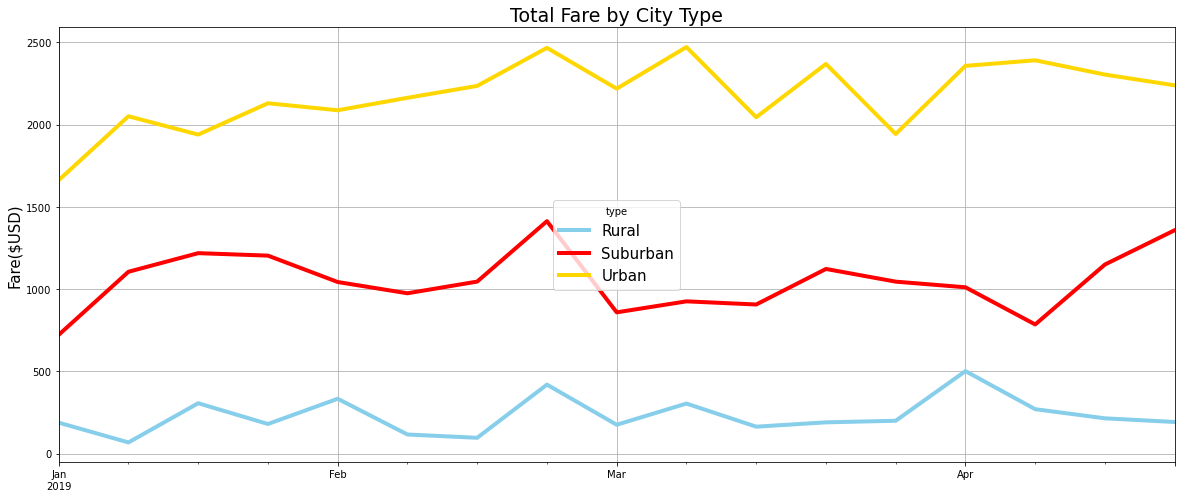

In [21]:
from datetime import datetime

type_sum_fares_week.plot(color=["skyblue","red","gold"], linewidth=4, figsize=(20,8))
plt.xlabel("")
plt.ylabel("Fare($USD)", fontsize=15)
plt.title("Total Fare by City Type", fontsize=19)
plt.grid(True)
plt.legend()
plt.xlim(datetime(2019,1,6),datetime(2019,4,28))
lgnd = plt.legend(fontsize="15", title="type", loc='center')

plt.savefig("PyBer_fare_summary.png")
plt.show()

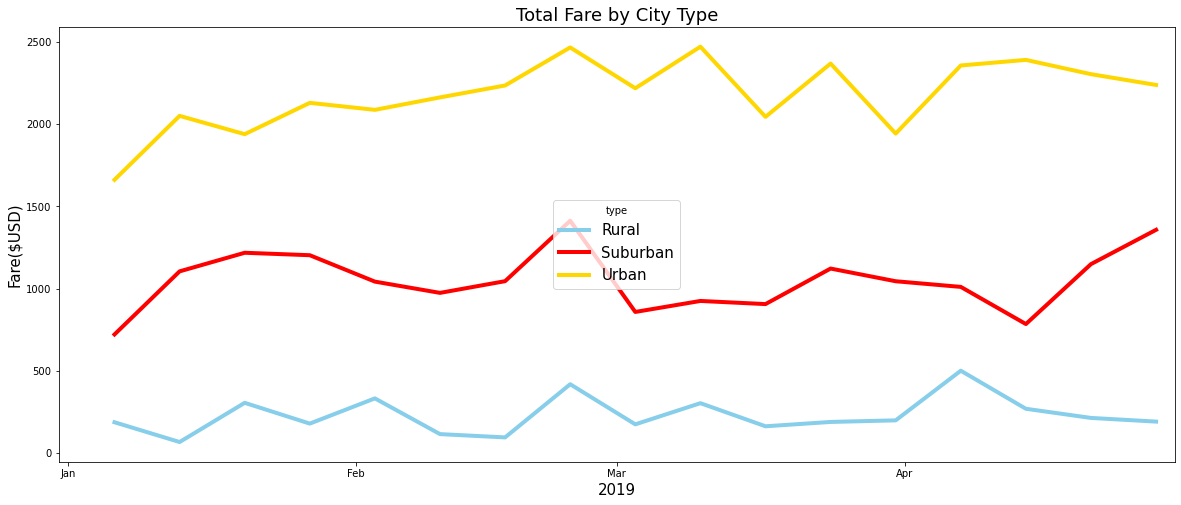

In [22]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import MonthLocator
from datetime import datetime

#Define labels
label1="Rural"
label2="Suburban"
label3="Urban"

#plot the chart
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(type_sum_fares_week["Rural"], label=label1, color='skyblue', linewidth=4)
ax.plot(type_sum_fares_week["Suburban"], label=label2, color='red', linewidth=4)
ax.plot(type_sum_fares_week["Urban"], label=label3, color='gold', linewidth=4)
ax.legend(title="type", loc='center', fontsize=15)

#set x, y label and title
ax.set_xlabel("2019", fontsize=15)
ax.set_ylabel("Fare($USD)", fontsize=15)
ax.set_title("Total Fare by City Type", fontsize=18)

#change the xaxis limit 
ax.set_xlim(datetime(2018,12,31),datetime(2019, 4, 30))

# change the format of the dates
ax.xaxis.set_major_formatter(DateFormatter('%b'))

#major tick locator
ax.xaxis.set_major_locator(MonthLocator())


plt.show()
            


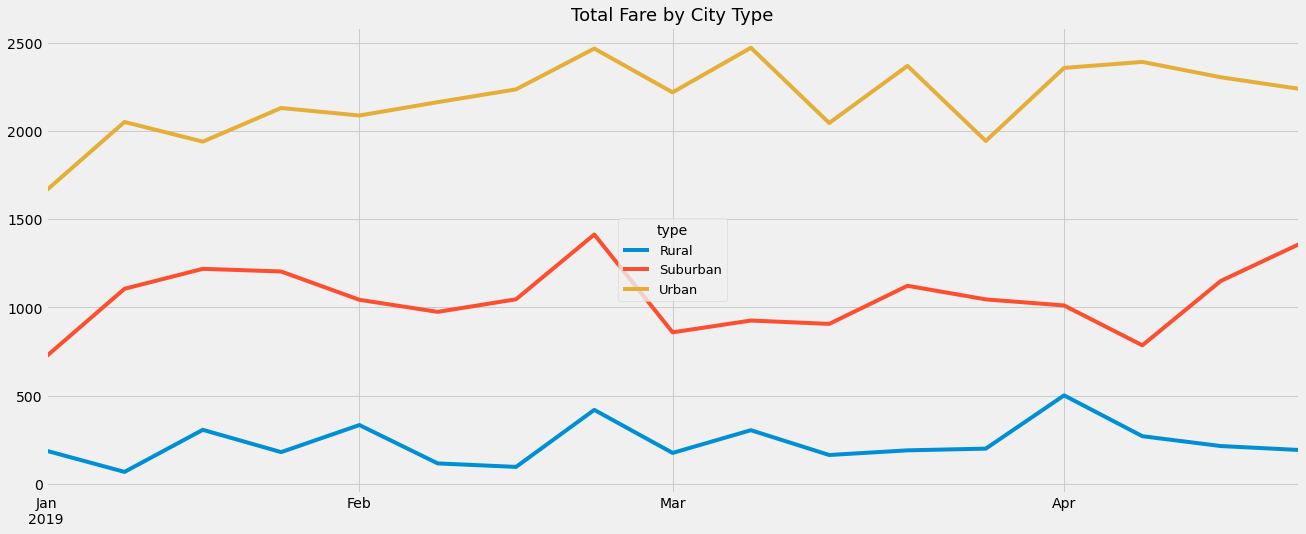

In [23]:
### Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
type_sum_fares_week.plot(figsize=(20,8))

lgnd = plt.legend(fontsize="13", title="type", loc='center')
plt.xlabel('')
plt.title("Total Fare by City Type", fontsize=18)
plt.show()